## Boston House Prediction

Dalam Notebook ini, penulis akan memprediksi harga dari dataset Boston sub-urban, Hasil data ini diperoleh dari Boston Standard Metropolitan Statistical Area (SMSA) in 1970 dengan penjelasan kolom sebagai berikut :

1) CRIM: per capita crime rate by town

2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5) NOX: nitric oxides concentration (parts per 10 million)

6) RM: average number of rooms per dwelling

7) AGE: proportion of owner-occupied units built prior to 1940

8) DIS: weighted distances to ﬁve Boston employment centers

9) RAD: index of accessibility to radial highways

10) TAX: full-value property-tax rate per $10,000

11) PTRATIO: pupil-teacher ratio by town 

12) B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 

13) LSTAT: % lower status of the population

14) MEDV: Median value of owner-occupied homes in $1000s

Data ini bisa diperoleh dari : https://archive.ics.uci.edu/ml/datasets/Housing

In [ ]:
#import library
import numpy as np
import pandas as pd #dataframe operation
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn import datasets
from scipy import stats

Impor dataset dan lihat apakah bisa dijalankan

In [65]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Melihat Statistik Deksriptif dari dataset

In [66]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Melihat plotting persebaran data

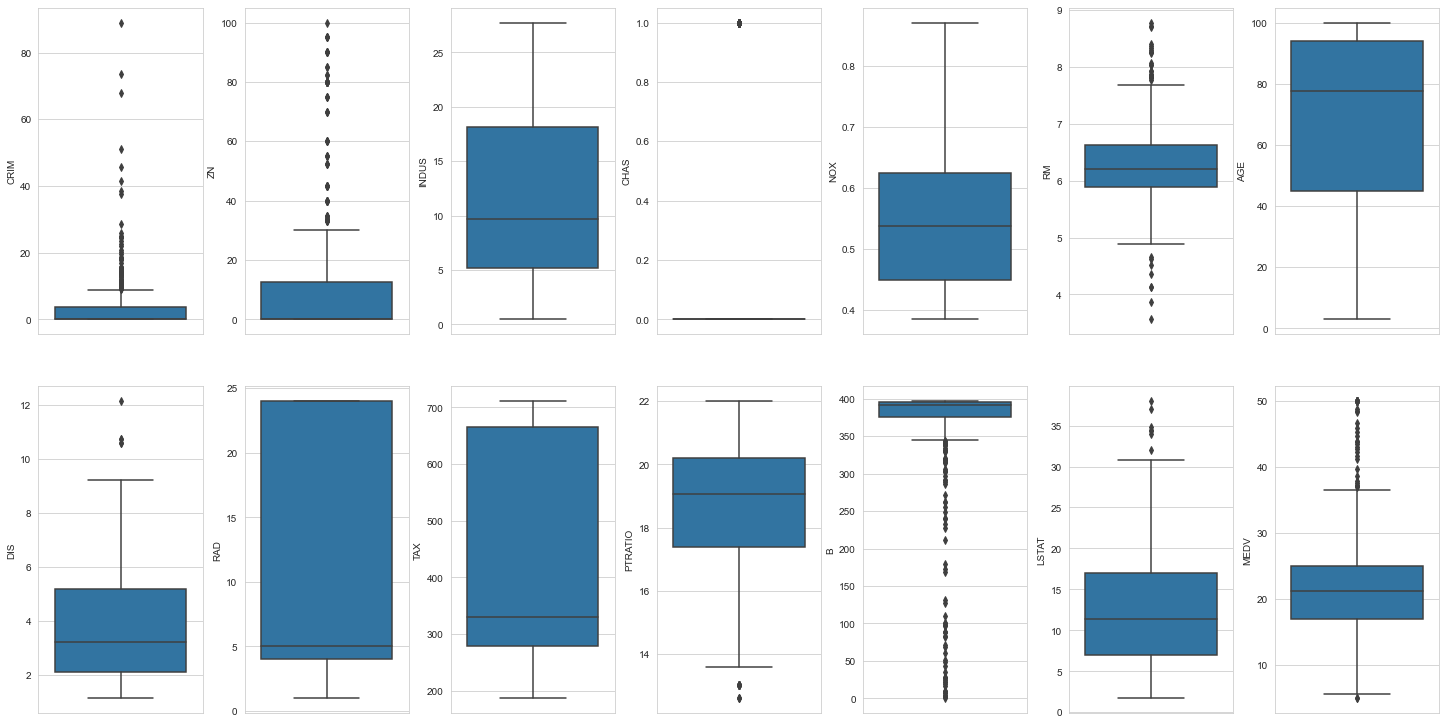

In [67]:
fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Terlihat dari plotting diatas bahwa terdapat outlier di kolom :
- CRIM
- ZN
- RM
- B
- LSTAT
- MEDV

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Mencari korelasi dengan kolom MEDV

In [70]:
corr_matrix = df.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

Mengambil kolom yang berkorelasi diatas 0.35 :
- RM
- TAX
- INDUS
- NOX
- AGE
- LSTAT

In [71]:
# Spliting target variable and independent variables
X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

Membuat Scaling data

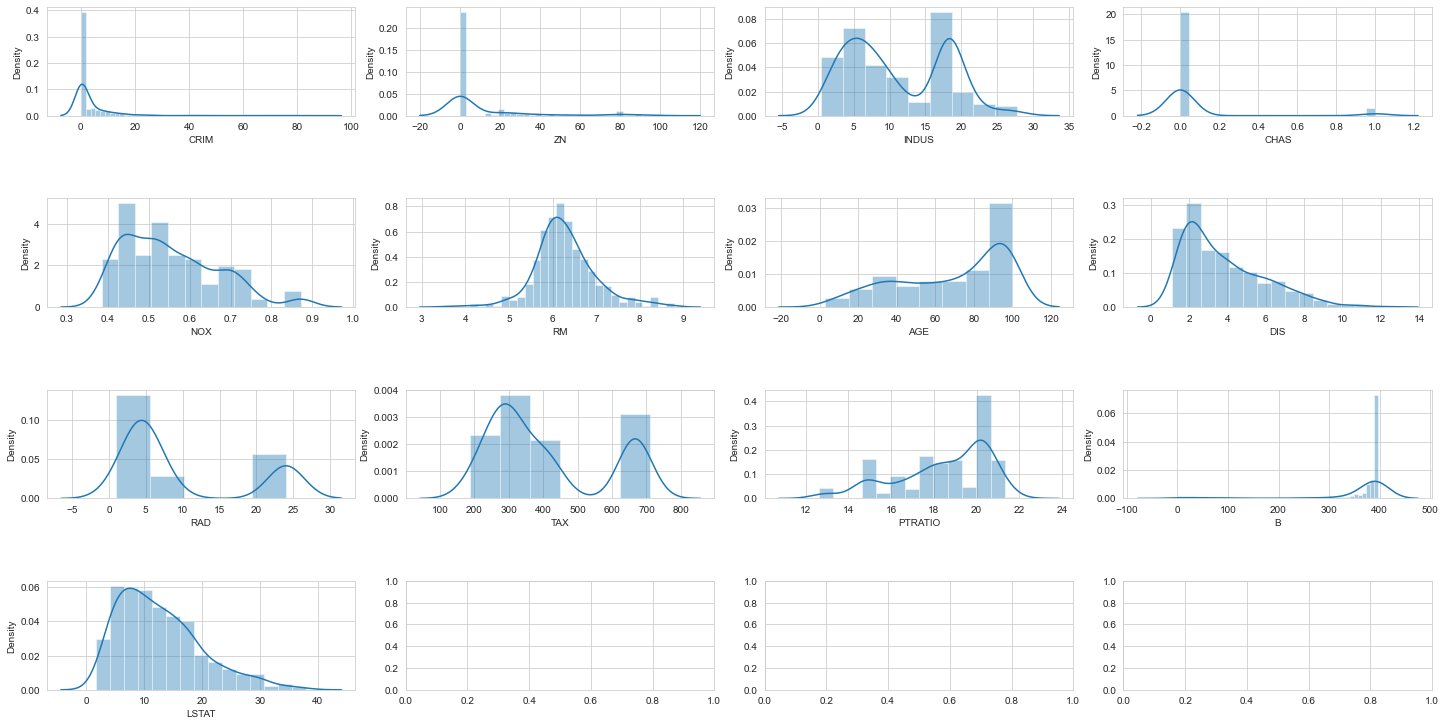

In [72]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k in X:
        sns.distplot(X[k], ax=axs[index])
        index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Terlihat data yang sudah cukup terdistribusi normal yaitu kolom RM
Untuk 4 kolom ada skewness positif di :
- LSTAT
- INDUS
- TAX
- NOX

Untuk 3 kolom ada skewness negatif di :
- AGE

In [96]:
X

,LSTAT,INDUS,TAX,NOX,AGE,RM
0,0.068258,0.034085,0.147338,0.198966,0.291409,0.665340
1,0.183043,0.178522,0.085803,0.109038,0.319077,0.604059
2,0.037647,0.178522,0.085803,0.109038,0.281942,0.908078
3,0.000000,0.029459,0.057596,0.091705,0.240127,0.833665
4,0.079066,0.029459,0.057596,0.091705,0.264485,0.892957
...,...,...,...,...,...,...
263,0.195816,0.290155,0.123343,0.235287,0.299866,0.672503
264,0.181574,0.290155,0.123343,0.235287,0.314996,0.484282
265,0.088440,0.290155,0.123343,0.235287,0.339496,0.824910
266,0.112950,0.290155,0.123343,0.235287,0.336816,0.752487


## Train Test Split

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [74]:
y_test = pd.DataFrame(y_test)

In [75]:
print(y_train.shape)
print(y_test.shape)
print(y.shape[0]*0.2)

(404,)
(102, 1)
101.2


## Linear Regression

In [76]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train) # Training step

LinearRegression()

In [77]:
X_train2 = sm.add_constant(X_train)
X_test2 = sm.add_constant(X_test)

In [78]:
# Value of y intercept
model_lr.intercept_

38.73515294888408

In [79]:
# Model prediction on train data
y_pred_lr = model_lr.predict(X_train)

In [80]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_lr))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_lr))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_lr))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_lr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_lr)))

R^2: 0.7465759348414512
Adjusted R^2: 0.7381284660028329
MAE: 3.3709931126767225
MSE: 22.57545122318268
RMSE: 4.7513630910700435


In [81]:
compare_mlr = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_lr, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['MEDV']-compare_mlr['Prediction']
compare_mlr.head(20)

,MEDV,Prediction
0,30.5,6.524708
1,22.0,43.913051
2,17.7,33.304486
3,50.0,18.875652
4,23.3,37.846882
5,19.9,32.203728
6,37.6,19.189769
7,23.3,18.424747
8,8.8,26.226226
9,32.5,19.496599


In [82]:
#Cek autokorelasi
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(compare_mlr['MEDV']-compare_mlr['Prediction'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 2.2436401735080516
Little to no autocorrelation 

Assumption satisfied


In [83]:
#Cek Multikolinearitas
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif["features"] = X_train2.columns
vif

,VIF Factor,features
0,557.581575,const
1,1.736357,CRIM
2,2.218573,ZN
3,3.939592,INDUS
4,1.101111,CHAS
5,4.317526,NOX
6,1.832493,RM
7,3.158161,AGE
8,3.837565,DIS
9,7.231113,RAD


Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.9267616657961602
Residuals are normally distributed


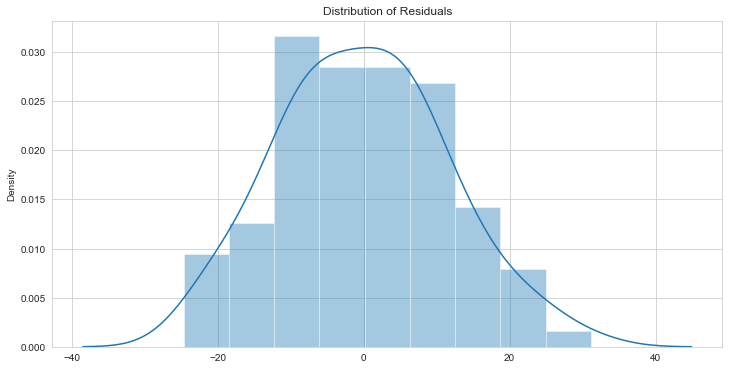


Assumption satisfied


In [84]:
# Cek normalitas
from statsmodels.stats.diagnostic import normal_ad

print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(compare_mlr['MEDV']-compare_mlr['Prediction'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(compare_mlr['MEDV']-compare_mlr['Prediction'])
plt.show()

print()
if p_value > 0.05:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')

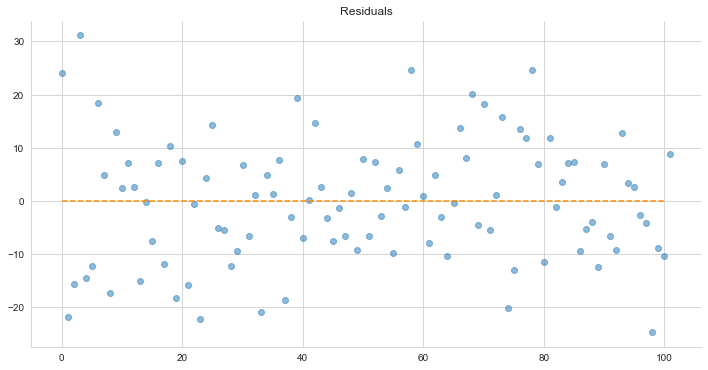

In [85]:
# Cek homoskedastisitas
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=compare_mlr.index, y=compare_mlr['MEDV']-compare_mlr['Prediction'], alpha=0.5)
plt.plot(np.repeat(0, compare_mlr.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

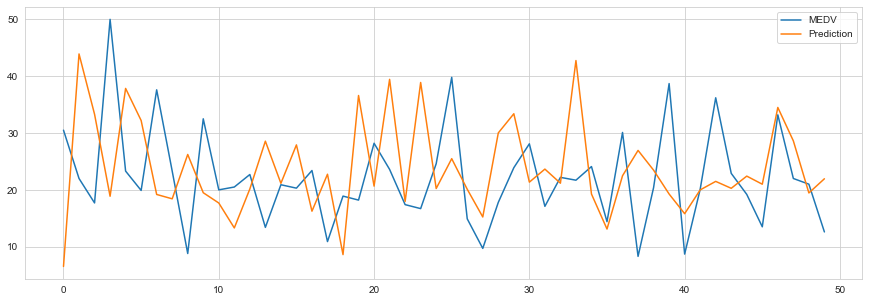

In [86]:
sns.set_style('whitegrid')
compare_mlr.head(50).plot(kind='line', figsize=(15, 5))

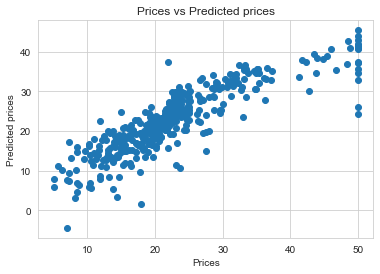

In [87]:
# Visualisasi perbedaan antara harga actual dan nilai prediksi
plt.scatter(y_train, y_pred_lr)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

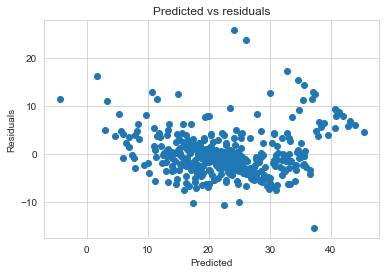

In [88]:
# Cek residual
plt.scatter(y_pred_lr,y_train-y_pred_lr)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [89]:
# Prediksi tes data dengan model
y_test_pred_lr = model_lr.predict(X_test)

In [90]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred_lr)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_lr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_lr))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_lr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr)))
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr))

R^2: 0.6995791930736371
Adjusted R^2: 0.655198846595879
MAE: 3.009347877448014
MSE: 19.813516840300686
RMSE: 4.451237675107979


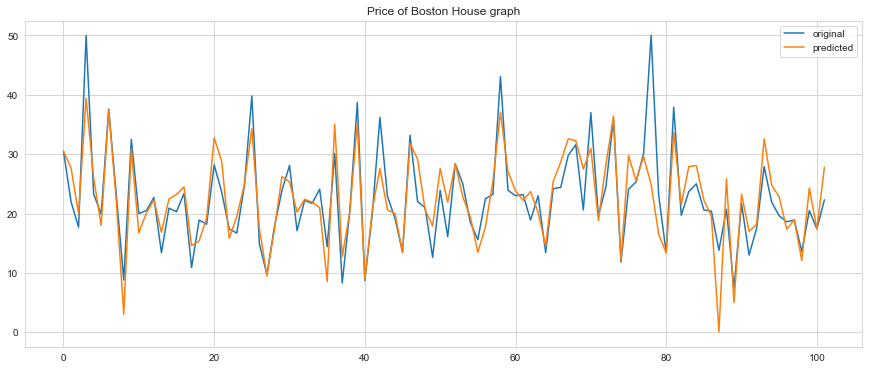

In [91]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_lr, label="predicted")
plt.title("Price of Boston House graph")
plt.legend()
plt.show()

Kalau Melihat perbedaan antara R^2 di data training dan data testing ada sedikit perbedaan, begitu juga di RMSE sehingga model yang kita lakukan tidak overfitting

Mari mencoba dengan model yang lain

Model Selanjutnya yang akan digunakan adalah **Random Forest Regression**
Secara umum, random forest ini merupakan pengembangan dari Decision Tree, yang dimana melakukan banyak sekali pengulangan decision Tree beberapa kali(bisa 100,200 dan seterusnya) sehingga membentuk sebuah forest(Hutan kecil)

Teknik ini memiliki tingkat akurasi cukup tinggi karena dia mengambil rataan (average) dari sekian banyak prediksi. Dengan demikian, teknik ini bisa meminimumkan bias (error) nya.

Satu atau dua hasil prediksi yang salah memang buruk, namun jika hanya ada 2 prediksi salah dari 500 prediksi, maka ia tidak akan menganggu nilai rataannya. Semakin banyak prediksi, semakin baik hasil akurasi dan stabilitasnya. Namun ia akan banyak memakan waktu (waktu komputasi bertambah)

## Random Forest Regression

In [92]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [93]:
# Model prediction on train data
y_pred_rfg = reg.predict(X_train)

In [94]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_rfg))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_rfg))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_rfg))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_rfg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_rfg)))

R^2: 0.9802273100643991
Adjusted R^2: 0.9795682203998791
MAE: 0.8696633663366322
MSE: 1.7613851980198005
RMSE: 1.3271718796070842


In [95]:
compare_rfg = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_rfg, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['MEDV']-compare_mlr['Prediction']
compare_rfg.head(20)

,MEDV,Prediction
0,30.5,8.818
1,22.0,49.090
2,17.7,34.952
3,50.0,14.976
4,23.3,43.214
5,19.9,31.841
6,37.6,18.948
7,23.3,20.944
8,8.8,24.387
9,32.5,20.636


In [96]:
#Cek autokorelasi
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(compare_rfg['MEDV']-compare_rfg['Prediction'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 2.2494255850489986
Little to no autocorrelation 

Assumption satisfied


In [97]:
#Cek Multikolinearitas
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif["features"] = X_train2.columns
vif

,VIF Factor,features
0,557.581575,const
1,1.736357,CRIM
2,2.218573,ZN
3,3.939592,INDUS
4,1.101111,CHAS
5,4.317526,NOX
6,1.832493,RM
7,3.158161,AGE
8,3.837565,DIS
9,7.231113,RAD


Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.6225435575851708
Residuals are normally distributed


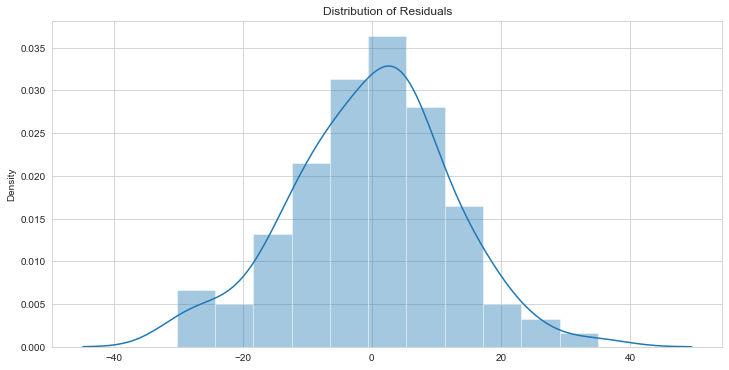


Assumption satisfied


In [98]:
# Cek normalitas
from statsmodels.stats.diagnostic import normal_ad

print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(compare_rfg['MEDV']-compare_rfg['Prediction'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(compare_rfg['MEDV']-compare_rfg['Prediction'])
plt.show()

print()
if p_value > 0.05:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')

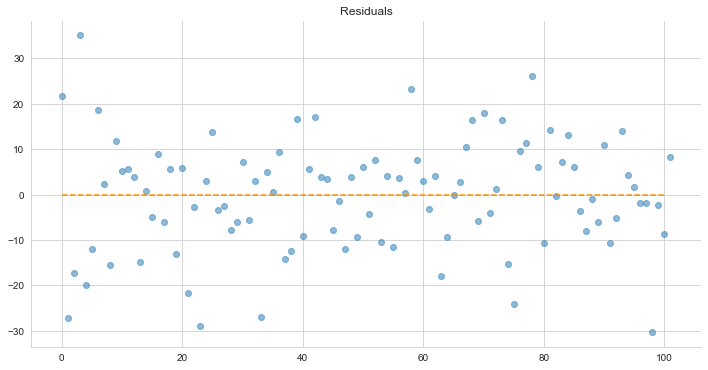

In [99]:
# Cek homoskedastisitas
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=compare_rfg.index, y=compare_rfg['MEDV']-compare_rfg['Prediction'], alpha=0.5)
plt.plot(np.repeat(0, compare_rfg.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

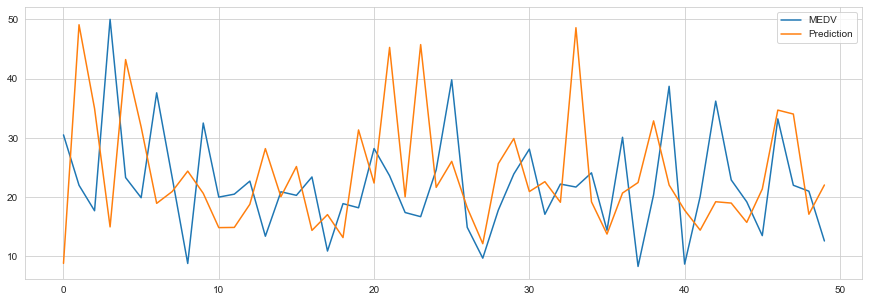

In [100]:
sns.set_style('whitegrid')
compare_rfg.head(50).plot(kind='line', figsize=(15, 5))

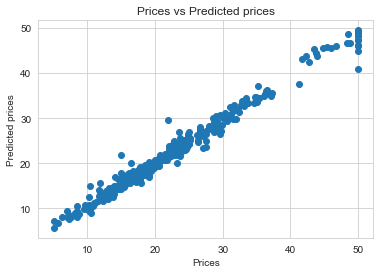

In [121]:
# Visualisasi perbedaan antara harga actual dan nilai prediksi
plt.scatter(y_train, y_pred_rfg)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

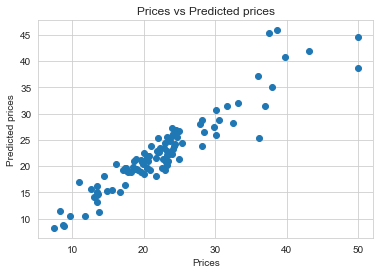

In [122]:
# Visualisasi perbedaan antara harga actual dan nilai prediksi
plt.scatter(y_test, y_test_pred_rfg)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [101]:
# Prediksi tes data dengan model
y_test_pred_rfg = reg.predict(X_test)

In [102]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred_rfg)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_rfg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_rfg))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_rfg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfg)))
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfg))

R^2: 0.880848156766568
Adjusted R^2: 0.8632461799252655
MAE: 1.9894803921568625
MSE: 7.8583673235294205
RMSE: 2.8032779604472724


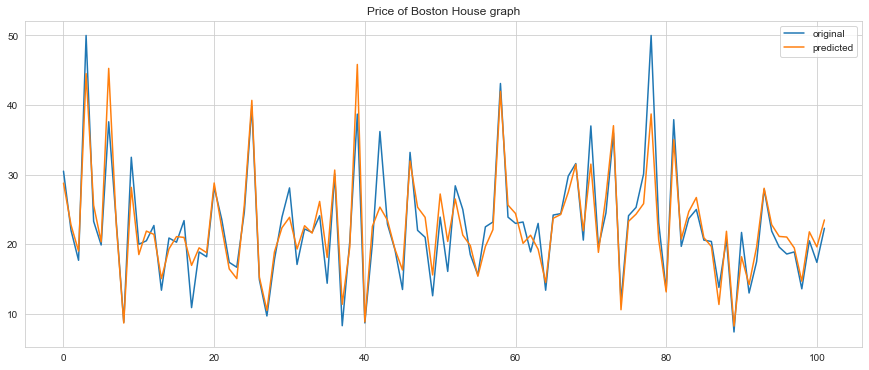

In [103]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_rfg, label="predicted")
plt.title("Price of Boston House graph")
plt.legend()
plt.show()

Kalau Melihat perbedaan antara R^2 di data training dan data testing begitu besar perbedaan, untuk di RMSE tidak terlalu besar maka model ini tidak terlalu overfitting

Mari mencoba dengan model yang lain

XGBoost adalah implementasi khusus dari Gradient Boosting dan XGBoost adalah singkatan dari Extreme Gradient Boosting, XGBoost menggunakan perkiraan yang lebih akurat dengan menggunakan gradien orde kedua dan regularisasi lanjutan.

![Mobile](https://ichi.pro/assets/images/max/724/1*3U80vT05byOG48lDlWPUhQ.png)

Fungsi Objective diselesaikan dengan menggunakan pendekatan polinomial Taylor orde kedua dan Sederhananya XgBoost mencoba menemukan nilai output optimal untuk pohon ft dalam iterasi t yang ditambahkan untuk meminimalkan fungsi kerugian di atas di semua titik data, lebih lanjut tentang ini di sini.

## XGBoost Regressor

In [104]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
xbreg = XGBRegressor()

# Train the model using the training sets 
xbreg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
# Model prediction on train data
y_pred_xg = xbreg.predict(X_train)

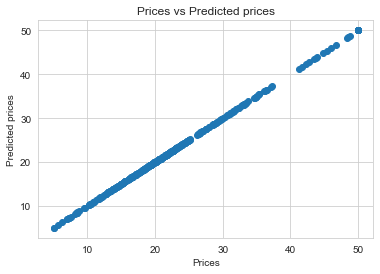

In [124]:
# Visualisasi perbedaan antara harga actual dan nilai prediksi
plt.scatter(y_train, y_pred_xg)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [106]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_xg))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_xg))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_xg))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_xg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_xg)))

R^2: 0.9999970706134559
Adjusted R^2: 0.9999969729672378
MAE: 0.011119504258184148
MSE: 0.0002609547873824476
RMSE: 0.016154095065414452


In [107]:
compare_xg = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_xg, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['MEDV']-compare_mlr['Prediction']
compare_xg.head(20)

,MEDV,Prediction
0,30.5,8.806005
1,22.0,49.993965
2,17.7,36.100792
3,50.0,14.603058
4,23.3,41.694599
5,19.9,32.202206
6,37.6,19.387741
7,23.3,20.802071
8,8.8,24.770443
9,32.5,20.610754


In [108]:
#Cek autokorelasi
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(compare_xg['MEDV']-compare_xg['Prediction'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 2.2482580325866874
Little to no autocorrelation 

Assumption satisfied


In [109]:
#Cek Multikolinearitas
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif["features"] = X_train2.columns
vif

,VIF Factor,features
0,557.581575,const
1,1.736357,CRIM
2,2.218573,ZN
3,3.939592,INDUS
4,1.101111,CHAS
5,4.317526,NOX
6,1.832493,RM
7,3.158161,AGE
8,3.837565,DIS
9,7.231113,RAD


Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.484510502666072
Residuals are normally distributed


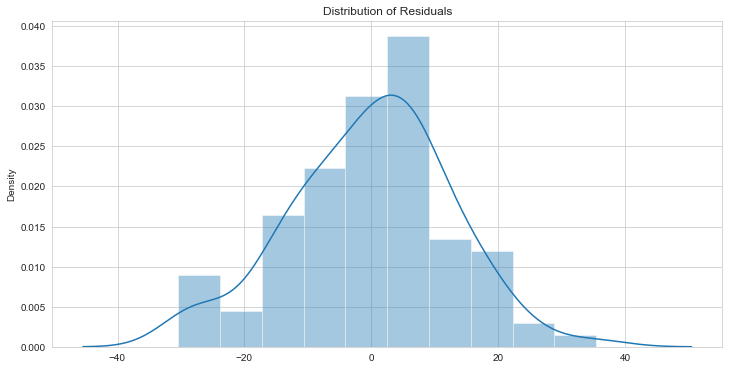


Assumption satisfied


In [110]:
# Cek normalitas
from statsmodels.stats.diagnostic import normal_ad

print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(compare_xg['MEDV']-compare_xg['Prediction'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(compare_xg['MEDV']-compare_xg['Prediction'])
plt.show()

print()
if p_value > 0.05:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')

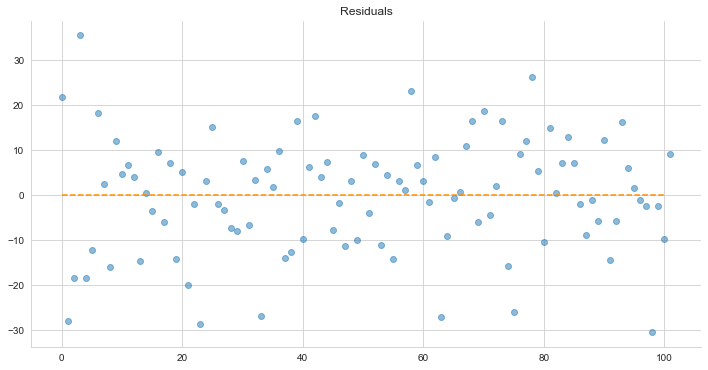

In [111]:
# Cek homoskedastisitas
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=compare_rfg.index, y=compare_xg['MEDV']-compare_xg['Prediction'], alpha=0.5)
plt.plot(np.repeat(0, compare_xg.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()

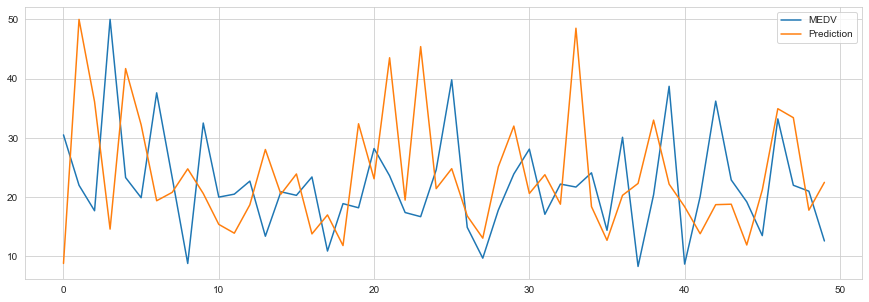

In [112]:
sns.set_style('whitegrid')
compare_xg.head(50).plot(kind='line', figsize=(15, 5))

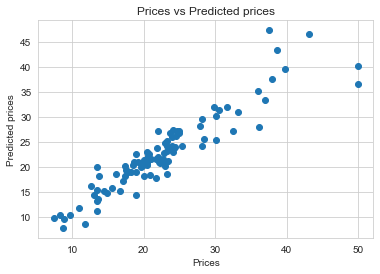

In [123]:
# Visualisasi perbedaan antara harga actual dan nilai prediksi
plt.scatter(y_test, y_test_pred_xg)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [113]:
# Prediksi tes data dengan model
y_test_pred_xg = xbreg.predict(X_test)

In [114]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred_xg)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_xg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_xg))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_xg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xg)))
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xg))

R^2: 0.8628193942086824
Adjusted R^2: 0.8425540774440559
MAE: 2.038824937857833
MSE: 9.047410100576514
RMSE: 3.007891304647911


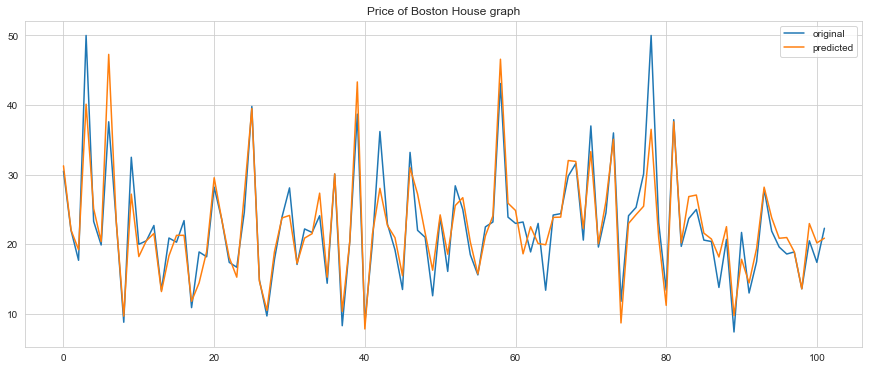

In [115]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_xg, label="predicted")
plt.title("Price of Boston House graph")
plt.legend()
plt.show()

## Evaluation dan Compare Model

In [116]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,88.084816
2,XGBoost,86.281939
0,Linear Regression,69.957919


In [118]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE Score': [rmse_lr, rmse_rf, rmse_xgb]})
models.sort_values(by='RMSE Score', ascending=True)

,Model,RMSE Score
1,Random Forest,2.803278
2,XGBoost,3.007891
0,Linear Regression,4.451238


## Kesimpulan Pada 3 model yang digunakan bisa dilihat dari R-Squared Score dan RMSE yg terendah dan tidak terlalu overfitting, maka kita bisa memakai Random Forest Regression